In [23]:
# 1: Uvoz biblioteka i učitavanje podataka

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from matplotlib import rcParams

#Stilizacija grafikona
plt.style.use("ggplot")
rcParams['figure.figsize'] = (12, 6)

# Ucitavanje podataka o potrosnji
data_path = 'Datasets/PERSONAL HOUSEHOLD CONSUMPTION, MONTHLY AVERAGE.csv'
data = pd.read_csv(data_path, sep=';')

# Ucitavanje podataka o platama
salary_data_path = 'Datasets/plate-godisnji-prosek.xlsx'
salary_data = pd.read_excel(salary_data_path)

# Izracunavanje procesne mesecne zarade
salary_data['Prosecna mesecna zarada'] = salary_data['Prosecna godisnja zarada'] / 12


In [24]:
# 2: Provera tipova podataka i nedostajućih vrednosti

# Provera tipova podataka
data_types = data.dtypes
print(data_types)

# Provera nedostajućih vrednosti
missing_values = data.isnull().sum()

idindikator         object
IDTer               object
nTer                object
IDTipNaselja        object
nTipNaselja         object
mes                  int64
god                  int64
IDVrPod              int64
nVrPod              object
IDCOICOP             int64
nCOICOP             object
vrednost           float64
idJedinicaMere     float64
nJedinicaMere      float64
nIzvorI             object
Indikator           object
IDStatusPodatka     object
nStatusPodatka      object
dtype: object


In [25]:
# 3: Statistički pregled podataka

# Osnovne statistike podataka
statistical_overview = data.describe()
print(statistical_overview)

          mes          god     IDVrPod     IDCOICOP      vrednost  \
count  6240.0  6240.000000  6240.00000  6240.000000   6240.000000   
mean      0.0  2013.625000     1.50000   600.000000   4217.537179   
std       0.0     4.807606     0.50004   374.195724  11280.801653   
min       0.0  2006.000000     1.00000     0.000000      0.100000   
25%       0.0  2009.750000     1.00000   300.000000      5.100000   
50%       0.0  2013.500000     1.50000   600.000000    100.000000   
75%       0.0  2017.250000     2.00000   900.000000   2922.250000   
max       0.0  2022.000000     2.00000  1200.000000  88083.000000   

       idJedinicaMere  nJedinicaMere  
count             0.0            0.0  
mean              NaN            NaN  
std               NaN            NaN  
min               NaN            NaN  
25%               NaN            NaN  
50%               NaN            NaN  
75%               NaN            NaN  
max               NaN            NaN  


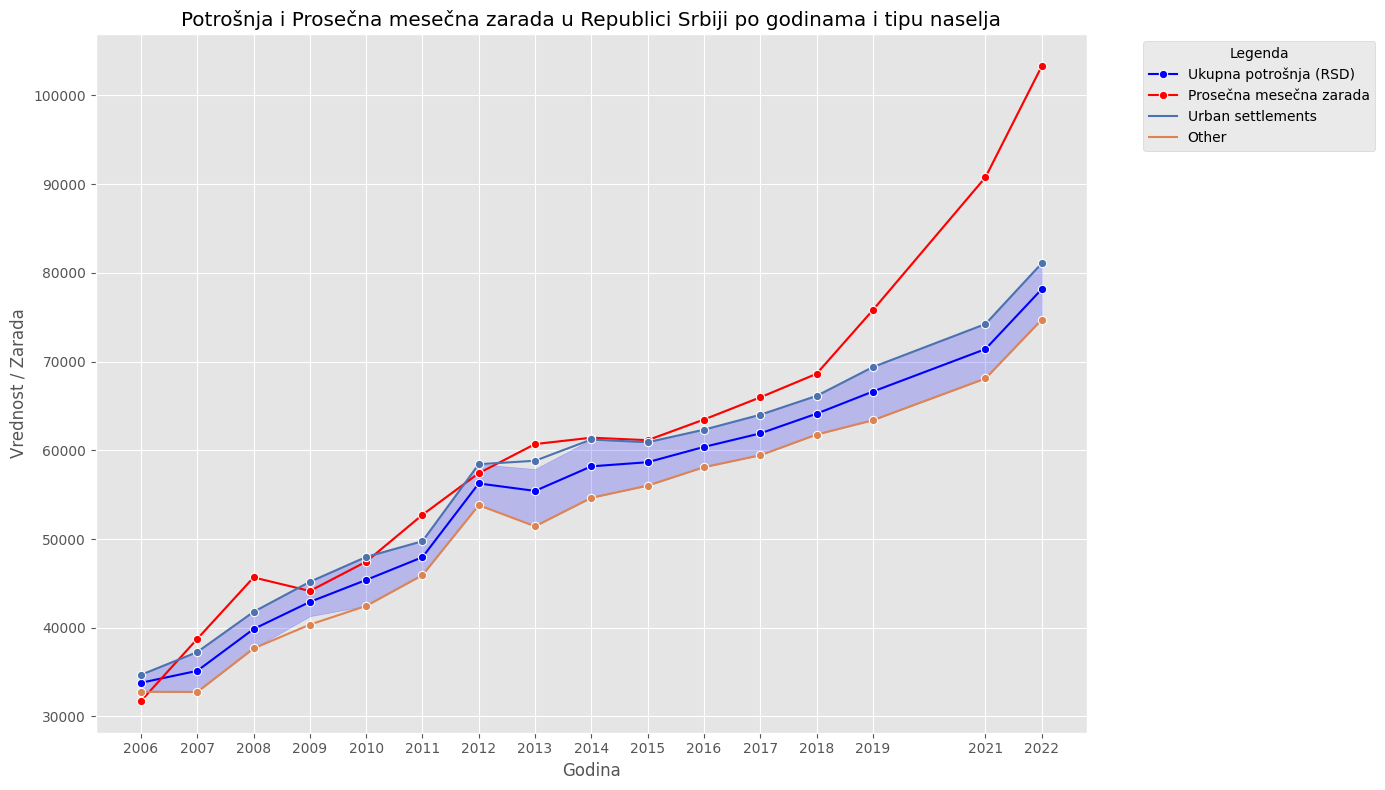

In [26]:
# 4: Vizualizacija podataka

# Priprema podataka za potrošnju po godinama
data_total_rsd = data[(data['nCOICOP'] == 'Total') & (data['nVrPod'] == 'RSD') & (data['nTer'] == 'REPUBLIC OF SERBIA')]

# Priprema podataka za potrošnju po tipu naselja
data_by_settlement_type = data[(data['nTipNaselja'] != 'Total') & (data['nCOICOP'] == 'Total') & (data['nVrPod'] == 'RSD') & (data['nTer'] == 'REPUBLIC OF SERBIA')]

# Spajanje podataka o potrošnji i zaradi
combined_data = data_total_rsd.merge(salary_data, left_on='god', right_on='Godina', how='left')


# Vizualizacija ukupne potrošnje, prosečnih mesečnih zarada i potrošnje po tipu naselja
plt.figure(figsize=(14, 8))
sns.lineplot(x='god', y='vrednost', data=combined_data, marker='o', label='Ukupna potrošnja (RSD)', color='blue')
sns.lineplot(x='god', y='Prosecna mesecna zarada', data=combined_data, marker='o', color='red', label='Prosečna mesečna zarada')
sns.lineplot(x='god', y='vrednost', hue='nTipNaselja', data=data_by_settlement_type, marker='o', palette='deep')

# Formatiranje grafikona
plt.title('Potrošnja i Prosečna mesečna zarada u Republici Srbiji po godinama i tipu naselja')
plt.xlabel('Godina')
plt.ylabel('Vrednost / Zarada')
plt.xticks(combined_data['god'].unique())
plt.legend(title='Legenda', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

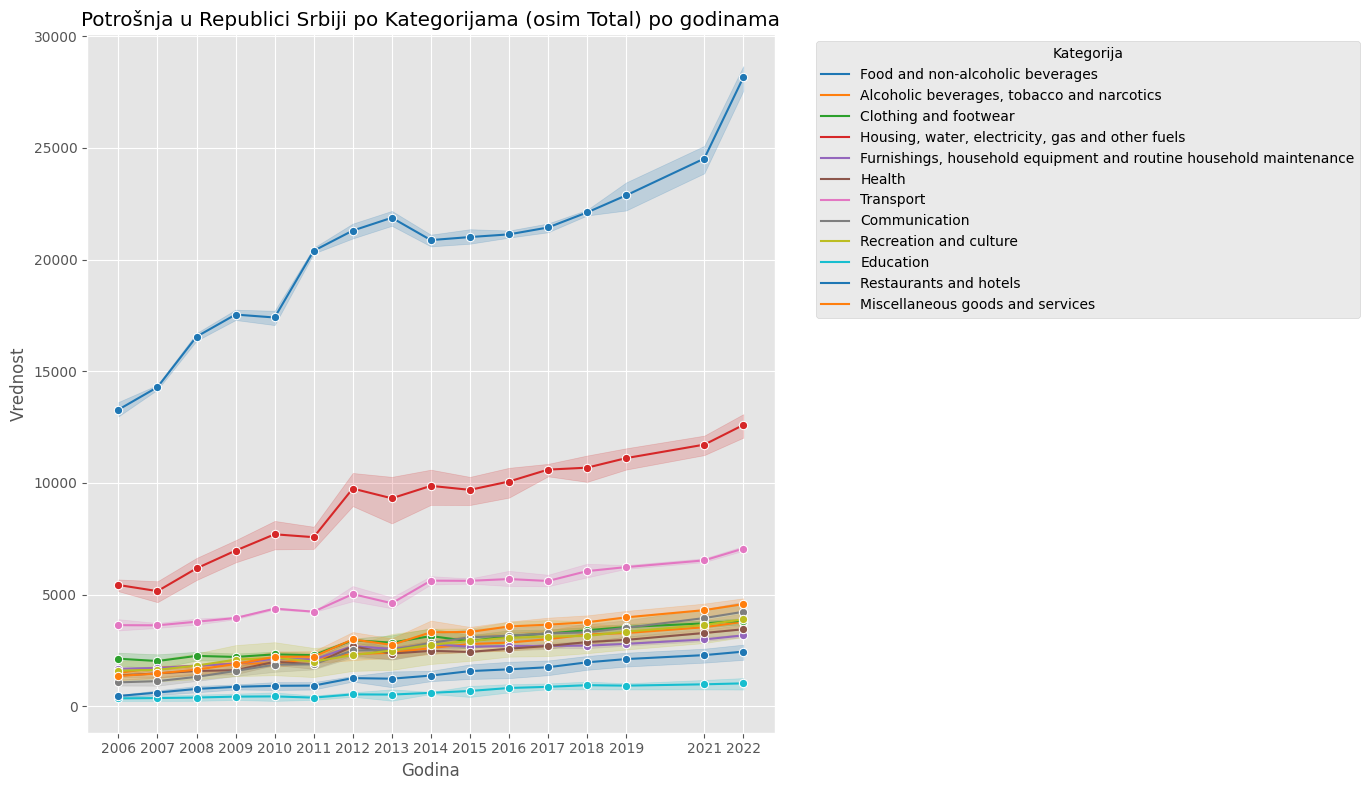

In [27]:
# Filtriranje podataka za sve kategorije osim 'Total'
data_not_total_rsd = data[(data['nCOICOP'] != 'Total') & (data['nVrPod'] == 'RSD') & (data['nTer'] == 'REPUBLIC OF SERBIA')]

# Sortiranje podataka po godinama i kategorijama za korektno prikazivanje u grafikonu
data_not_total_rsd_sorted = data_not_total_rsd.sort_values(by=['god', 'IDCOICOP'])

# Vizualizacija potrošnje po kategorijama
plt.figure(figsize=(14, 8))
sns.lineplot(x='god', y='vrednost', hue='nCOICOP', data=data_not_total_rsd_sorted, marker='o', palette='tab10')

# Formatiranje grafikona
plt.title('Potrošnja u Republici Srbiji po Kategorijama (osim Total) po godinama')
plt.xlabel('Godina')
plt.ylabel('Vrednost')
plt.xticks(data_not_total_rsd_sorted['god'].unique())
plt.legend(title='Kategorija', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


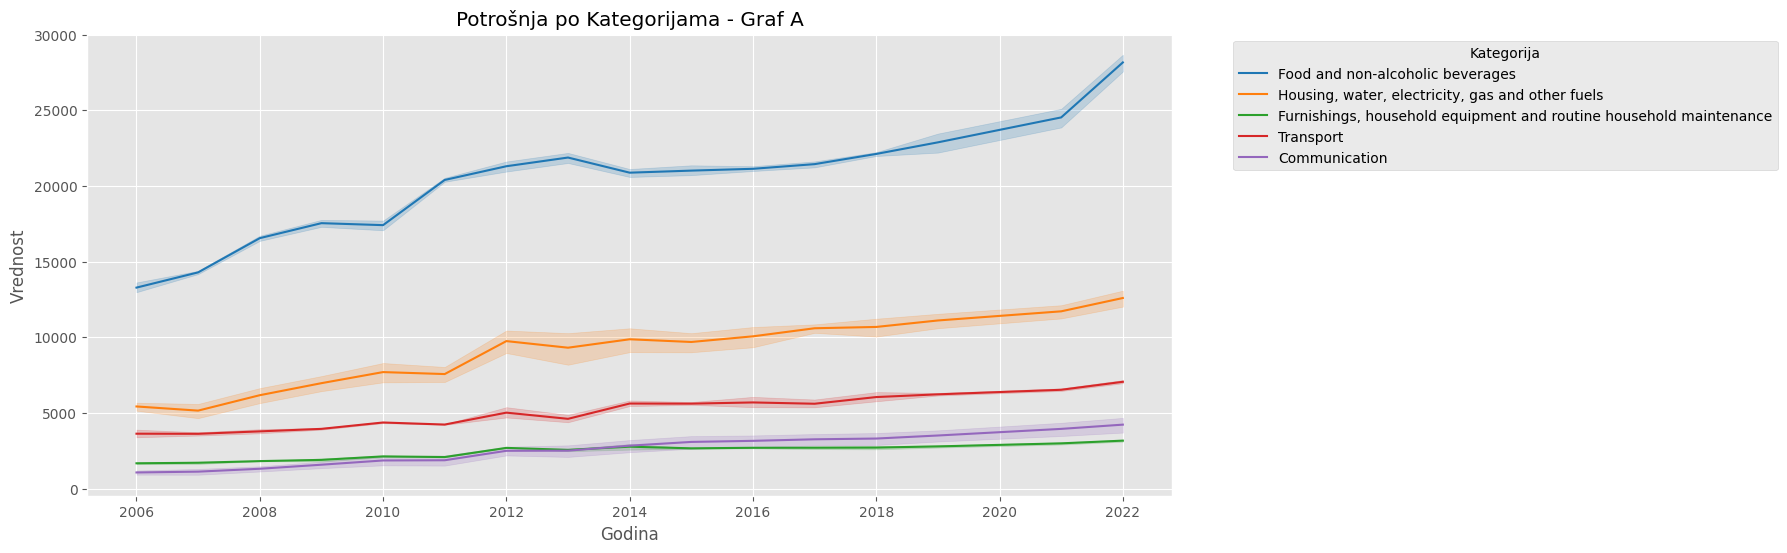

In [30]:
# Graf A - Potrošnja po Kategorijama
plt.figure(figsize=(14, 6))
sns.lineplot(data=data_graph_a, x='god', y='vrednost', hue='nCOICOP', palette='tab10')
plt.title('Potrošnja po Kategorijama - Graf A')
plt.xlabel('Godina')
plt.ylabel('Vrednost')
plt.legend(title='Kategorija', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()


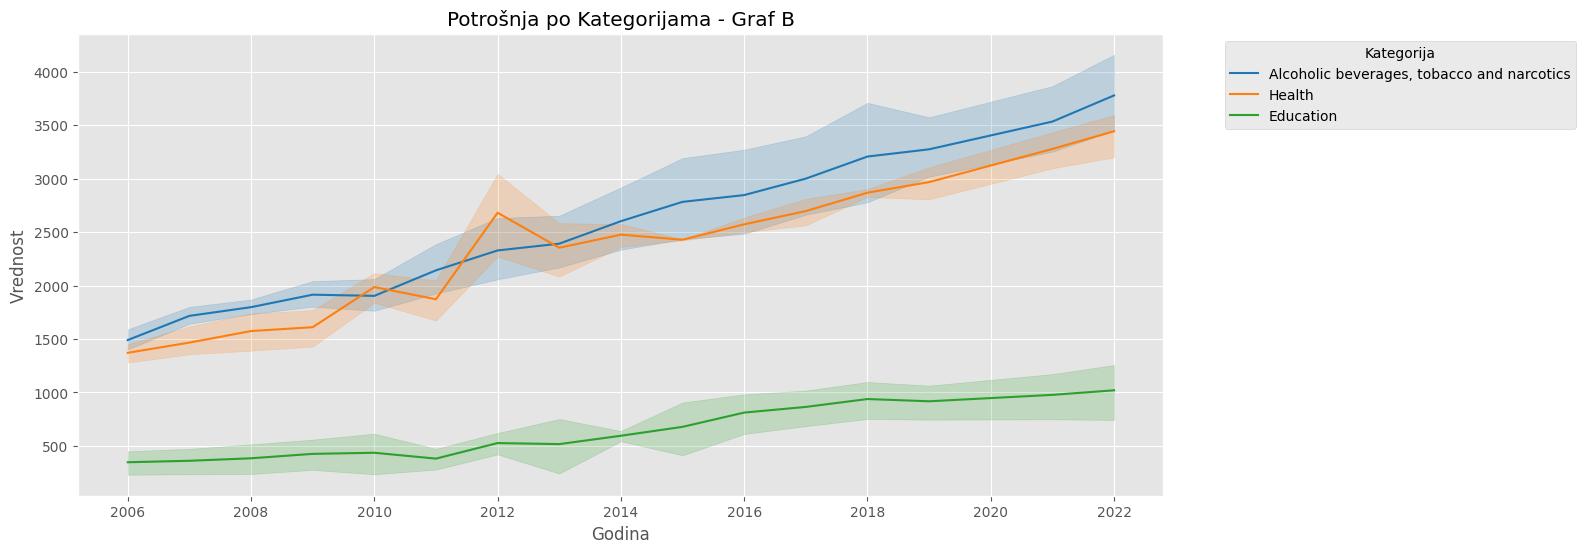

In [31]:
# Graf B - Potrošnja po Kategorijama
plt.figure(figsize=(14, 6))
sns.lineplot(data=data_graph_b, x='god', y='vrednost', hue='nCOICOP', palette='tab10')
plt.title('Potrošnja po Kategorijama - Graf B')
plt.xlabel('Godina')
plt.ylabel('Vrednost')
plt.legend(title='Kategorija', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()


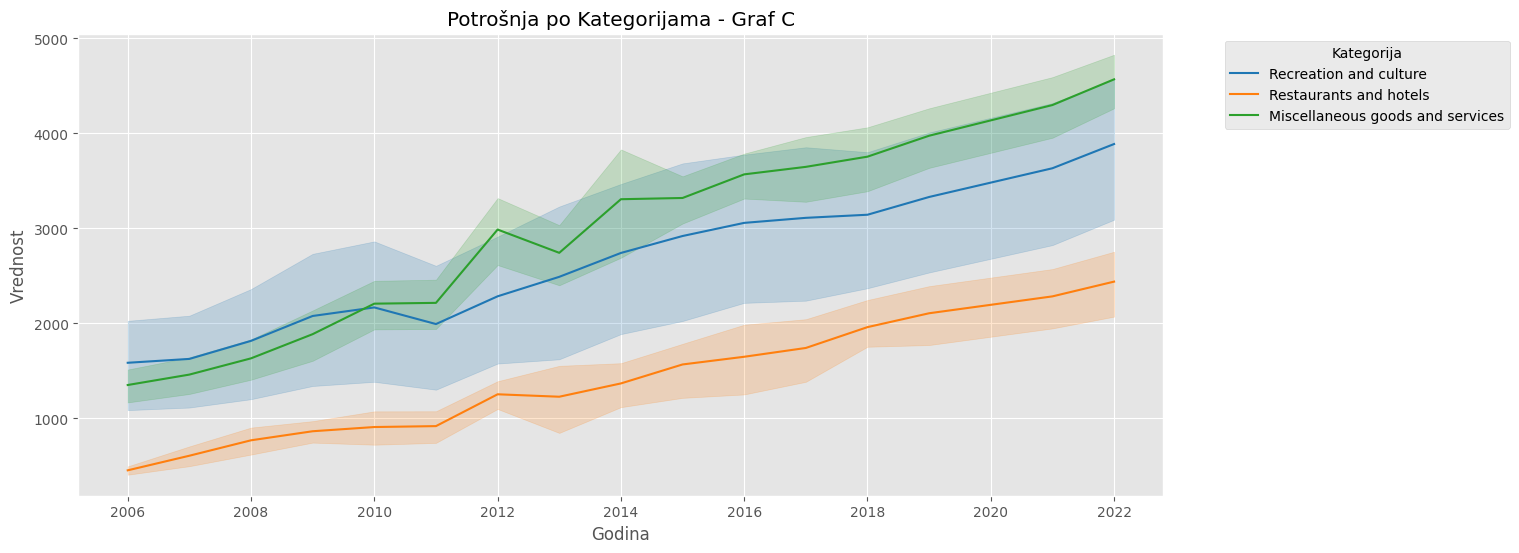

In [32]:
# Graf C - Potrošnja po Kategorijama
plt.figure(figsize=(14, 6))
sns.lineplot(data=data_graph_c, x='god', y='vrednost', hue='nCOICOP', palette='tab10')
plt.title('Potrošnja po Kategorijama - Graf C')
plt.xlabel('Godina')
plt.ylabel('Vrednost')
plt.legend(title='Kategorija', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()
